# FITTING TRANSFER FUNCTIONS

# Preliminaries

In [1]:
import controlSBML as ctl
import controlSBML.constants as cn
import controlSBML.siso_transfer_function_builder as stb
from controlSBML.staircase import Staircase

import control
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import SBMLDiagrams
import tellurium as te

# Models

## Linear Model

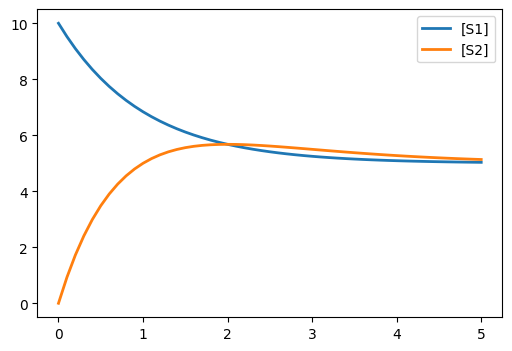

In [2]:
LINEAR_MDL = """
J0:  -> S1; k1
J1: S1 -> S2; S1
J2: S2 -> ; S2

k1 = 5
S1 = 10
S2 = 0
"""
rr = te.loada(LINEAR_MDL)
rr.simulate()
rr.plot()

In [3]:
LINEAR_CTLSB = ctl.ControlSBML(LINEAR_MDL, input_names=["S1"], output_names=["S2"])
LINEAR_BUILDER = LINEAR_CTLSB.makeSISOTransferFunctionBuilder()

## Wolf Model

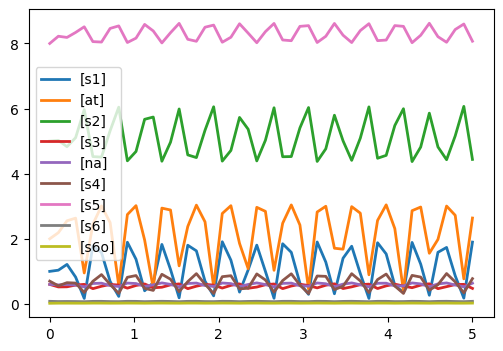

In [4]:
WOLF_URL = "https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml"
rr = te.loadSBMLModel(WOLF_URL)
rr.simulate(0, 5, 50)
rr.plot()

In [5]:
WOLF_CTLSB = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml",
              input_names=["at", "na"], output_names=["s5", "s6"])
WOLF_BUILDER = WOLF_CTLSB.makeMIMOTransferFunctionBuilder()

In [8]:
print(WOLF_CTLSB.antimony)

// Created by libAntimony v2.13.2
model *Wolf2000_Glycolytic_Oscillations()

  // Compartments and Species:
  compartment compartment_;
  species s1 in compartment_, at_ in compartment_, s2 in compartment_, s3 in compartment_;
  species na in compartment_, s4 in compartment_, s5 in compartment_, s6 in compartment_;
  species s6o in compartment_;

  // Reactions:
  v1: s1 + 2 at_ -> s2; compartment_*k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; compartment_*k2*s2;
  v3: s3 + na -> s4 + at_; compartment_*((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; compartment_*k4*s4*(atot - at_);
  v5: s5 -> s6; compartment_*k5*s5;
  v7: at_ -> ; compartment_*k7*at_;
  v8: s3 -> na; compartment_*k8*s3*(ntot - na);
  v9: s6o -> ; compartment_*k9*s6o;
  v10: s6 -> 0.1 s6o; compartment_*k10*(s6 - s6o);
  v6: s6 -> na; compartment_*k6*s6*(ntot - na);
  v0:  -> s1; compartment_*k0;

  // Species initializations:
  s1 = 1;
  at_ = 2;
 

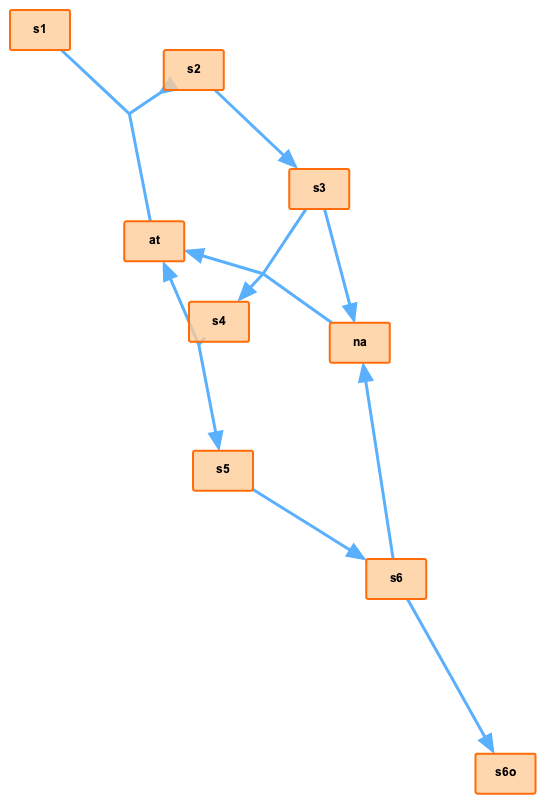

In [17]:
df = SBMLDiagrams.load(WOLF_CTLSB.roadrunner.getSBML())
df.autolayout(iterations=1000, k=0.5, scale=500)
df.draw()

# Linear Model Fitting Transfer Functions

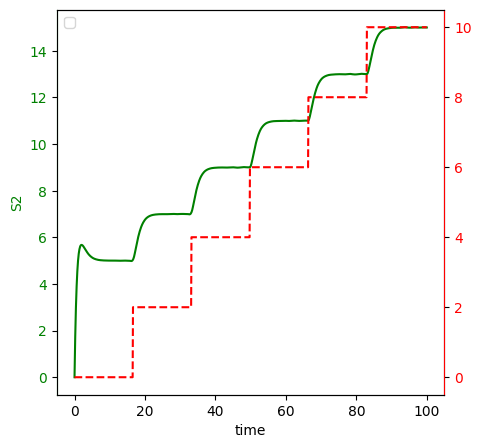

In [10]:
staircase_response_df = LINEAR_BUILDER.makeStaircaseResponse(end_time=100)
_ = LINEAR_BUILDER.plotStaircaseResponse(staircase_response_df, figsize=(5,5))

# Wolf Fitting Transfer Function

In [27]:
staircase = Staircase(initial_value=0, final_value=15)
fitter_result = WOLF_BUILDER.fitTransferFunction(2, 3, end_time=100, staircase=staircase)

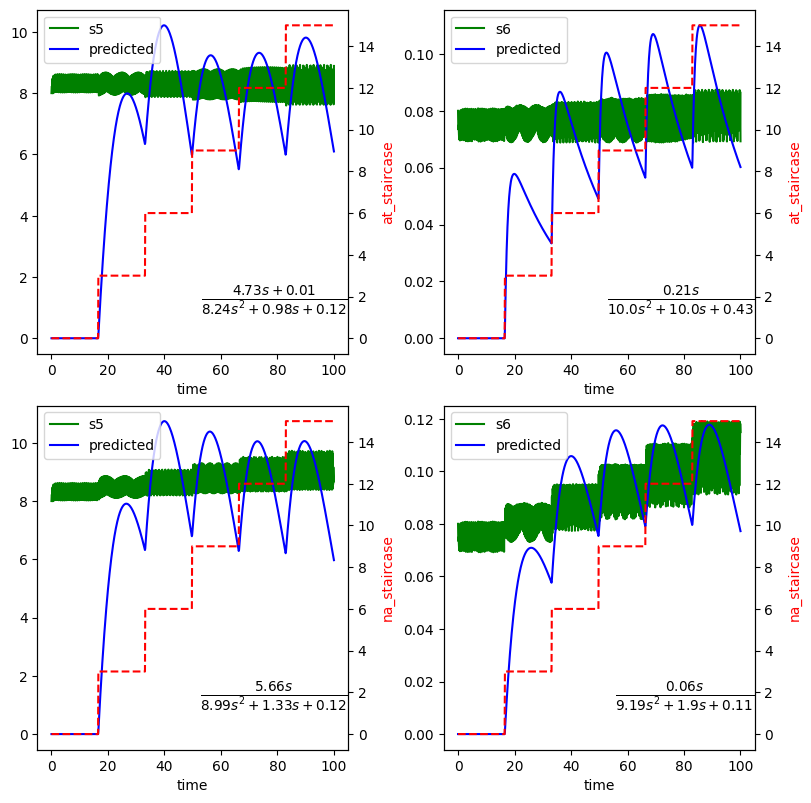

In [29]:
_ = WOLF_BUILDER.plotFitTransferFunction(fitter_result, figsize=(8,8))

* na: NAD+
* at: ATP
* s5: pyruvate
* s6: acetaldehyde

# Analysis of Alexis Paper

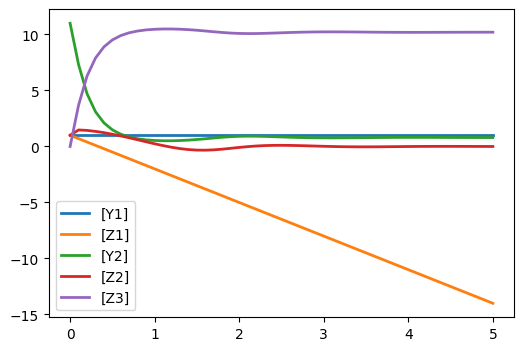

In [22]:
# Network
model = """
Y1 -> Y1 + Z1; k1*Y1
Y2 -> Y2 + Z2; k2*Y2
Y2 + Z2 -> Z3; k3*Y2*Z2
Z1 + Z2 ->  ; nu

Y1 = 1
Y2 = 11
Z1 = 1
Z2 = 1
k1 = 1
k2 = 5
k3 = 3
nu = 4
"""
rr = te.loada(model)
rr.simulate()
rr.plot()